In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import pandas as pd

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#import splitfolders
import os
import cv2
import numpy as np
import random

In [ ]:
labels = ['0', '1','2','3','4','5']
img_size = 128
def get_data(data_dir):
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
    

In [ ]:
!unzip '/content/drive/MyDrive/Training/covid infection percent 499/Train-20211227T124202Z-001.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Train/Classified_Images/5/Image_0329.png  
  inflating: Train/Classified_Images/5/Image_0280.png  
  inflating: Train/Classified_Images/5/Image_0295.png  
  inflating: Train/Classified_Images/3/Image_1983.png  
  inflating: Train/Classified_Images/5/Image_0294.png  
  inflating: Train/Classified_Images/5/Image_0293.png  
  inflating: Train/Classified_Images/5/Image_0288.png  
  inflating: Train/Classified_Images/5/Image_0330.png  
  inflating: Train/Classified_Images/5/Image_0444.png  
  inflating: Train/Classified_Images/5/Image_0443.png  
  inflating: Train/Classified_Images/5/Image_0439.png  
  inflating: Train/Classified_Images/5/Image_0292.png  
  inflating: Train/Classified_Images/5/Image_0337.png  
  inflating: Train/Classified_Images/5/Image_0331.png  
  inflating: Train/Classified_Images/5/Image_0433.png  
  inflating: Train/Classified_Images/5/Image_0283.png  
  inflating: Train/Train/Image_2875.png  
  inflating

In [ ]:
import os

In [ ]:
len(os.listdir('/content/Train/Classified_Images/0')), \
len(os.listdir('/content/Train/Classified_Images/1')),\
len(os.listdir('/content/Train/Classified_Images/2')),\
len(os.listdir('/content/Train/Classified_Images/3')),\
len(os.listdir('/content/Train/Classified_Images/4')),\
len(os.listdir('/content/Train/Classified_Images/5'))

(735, 1164, 431, 338, 201, 184)

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Training/covid infection percent 499/Dataset1', output="splitted_data", seed=1337, ratio=(.7, 0.2,0.1)) 

Copying files: 3053 files [01:29, 34.27 files/s] 


In [ ]:
!zip -r '/content/splitted_data.zip' '/content/splitted_data'

!cp '/content/splitted_data.zip' -d '/content/drive/MyDrive/Training/covid infection percent 499'

  adding: content/splitted_data/ (stored 0%)
  adding: content/splitted_data/val/ (stored 0%)
  adding: content/splitted_data/val/5/ (stored 0%)
  adding: content/splitted_data/val/5/Image_0290.png (deflated 3%)
  adding: content/splitted_data/val/5/Image_0262.png (deflated 3%)
  adding: content/splitted_data/val/5/Image_1909.png (deflated 3%)
  adding: content/splitted_data/val/5/Image_1965.png (deflated 4%)
  adding: content/splitted_data/val/5/Image_1922.png (deflated 4%)
  adding: content/splitted_data/val/5/Image_1968.png (deflated 4%)
  adding: content/splitted_data/val/5/Image_1908.png (deflated 3%)
  adding: content/splitted_data/val/5/Image_0261.png (deflated 4%)
  adding: content/splitted_data/val/5/Image_0992.png (deflated 3%)
  adding: content/splitted_data/val/5/Image_0288.png (deflated 3%)
  adding: content/splitted_data/val/5/Image_2303.png (deflated 3%)
  adding: content/splitted_data/val/5/Image_1944.png (deflated 3%)
  adding: content/splitted_data/val/5/Image_2300.pn

In [ ]:
!cp '/content/drive/MyDrive/Training/covid infection percent 499/splitted_data.zip' -d '/content'
!unzip '/content/splitted_data.zip'

Archive:  /content/splitted_data.zip
   creating: content/splitted_data/
   creating: content/splitted_data/val/
   creating: content/splitted_data/val/5/
  inflating: content/splitted_data/val/5/Image_0290.png  
  inflating: content/splitted_data/val/5/Image_0262.png  
  inflating: content/splitted_data/val/5/Image_1909.png  
  inflating: content/splitted_data/val/5/Image_1965.png  
  inflating: content/splitted_data/val/5/Image_1922.png  
  inflating: content/splitted_data/val/5/Image_1968.png  
  inflating: content/splitted_data/val/5/Image_1908.png  
  inflating: content/splitted_data/val/5/Image_0261.png  
  inflating: content/splitted_data/val/5/Image_0992.png  
  inflating: content/splitted_data/val/5/Image_0288.png  
  inflating: content/splitted_data/val/5/Image_2303.png  
  inflating: content/splitted_data/val/5/Image_1944.png  
  inflating: content/splitted_data/val/5/Image_2300.png  
  inflating: content/splitted_data/val/5/Image_0285.png  
  inflating: content/splitted_dat

In [ ]:
!pip install scikit-plot

In [ ]:
train = get_data('/content/splitted_data/train')
val = get_data('/content/splitted_data/val')
#test = get_data('/content/drive/MyDrive/Colab Notebooks/3_fold_splited_Brain_Tumor_test_train_val/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


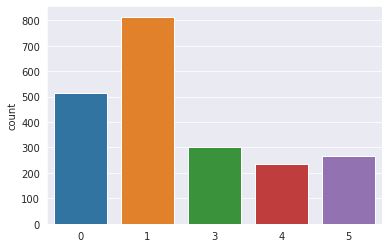

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
      l.append("0")
    elif(i[1]==1):
      l.append('1')
    elif (i[1]==2):
      l.append('3')
    elif (i[1]==3):
      l.append('4')
    else:
        l.append("5")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, '0')

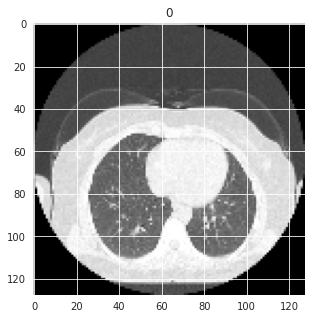

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, '5')

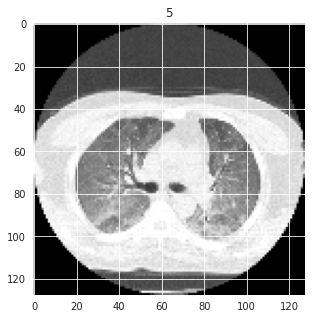

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255


x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
x_train.shape

(2133, 128, 128, 3)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,
        fill_mode='nearest',  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
def get_model():

  model = Sequential()
  model.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(128,128,3)))
  model.add(MaxPool2D())

  model.add(Conv2D(64, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.2))

  #model.add(Conv2D(64, 3, padding="same", activation="relu"))
  #model.add(BatchNormalization())
  #model.add(MaxPool2D())

  model.add(Conv2D(128, 3, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D())

  model.add(Conv2D(128, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.2))


  model.add(Flatten())
  model.add(Dense(128,activation="relu"))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(6, activation="softmax"))

  return model

model=get_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       7

In [ ]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 200,batch_size=64 , validation_data = (x_val, y_val))

Epoch 1/200
34/34 [==============================] - 4s 107ms/step - loss: 0.1748 - accuracy: 0.9409 - val_loss: 0.4575 - val_accuracy: 0.8289
Epoch 2/200
34/34 [==============================] - 3s 99ms/step - loss: 0.1617 - accuracy: 0.9461 - val_loss: 0.4752 - val_accuracy: 0.8289
Epoch 3/200
34/34 [==============================] - 3s 98ms/step - loss: 0.1676 - accuracy: 0.9414 - val_loss: 0.4549 - val_accuracy: 0.8273
Epoch 4/200
34/34 [==============================] - 3s 98ms/step - loss: 0.1593 - accuracy: 0.9451 - val_loss: 0.4847 - val_accuracy: 0.8257
Epoch 5/200
34/34 [==============================] - 3s 98ms/step - loss: 0.1445 - accuracy: 0.9517 - val_loss: 0.4893 - val_accuracy: 0.8322
Epoch 6/200
34/34 [==============================] - 3s 98ms/step - loss: 0.1672 - accuracy: 0.9372 - val_loss: 0.6466 - val_accuracy: 0.7845
Epoch 7/200
34/34 [==============================] - 3s 99ms/step - loss: 0.1550 - accuracy: 0.9391 - val_loss: 0.5243 - val_accuracy: 0.8289
Epoch

In [ ]:
scores = model.evaluate(x_val,y_val , verbose=0)

In [ ]:
accuracy= scores[1]*100
loss=scores[0]
print('Accuracy: ', accuracy)
print('Loss: ',  loss)

Accuracy:  81.41447305679321
Loss:  1.0130119323730469


In [ ]:
model.save('model.h5')

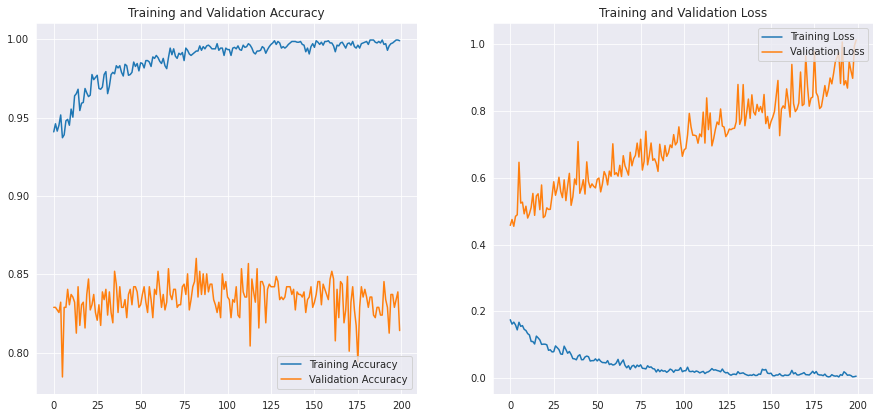

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

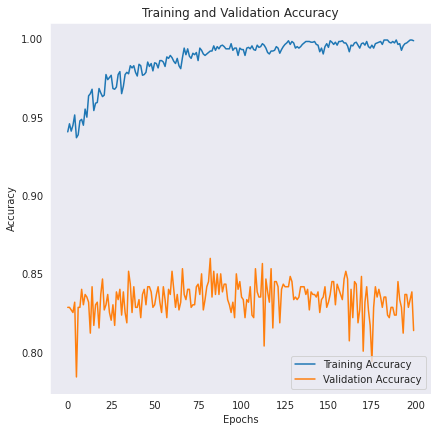

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(False)
plt.title('Training and Validation Accuracy')

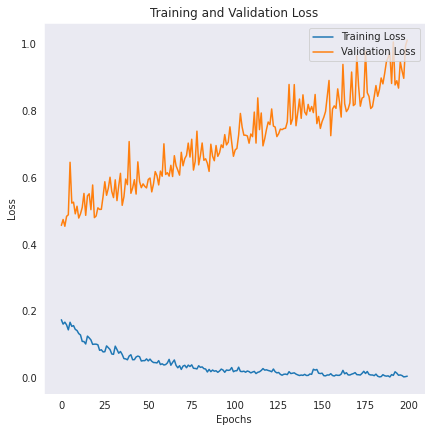

In [ ]:
epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(False)
plt.show()

In [ ]:
model=tf.keras.models.load_model('model.h5')

In [ ]:
prediction=model.predict([x_val])

In [ ]:
print(np.argmax(prediction[4]))

0


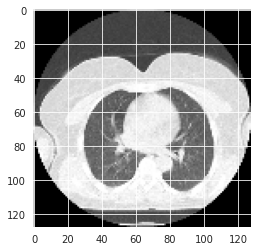

In [ ]:
plt.imshow(x_val[4])
plt.show()